In [1]:
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

order_one = [
    "base",
    "balanced_on", "balanced_in", "balanced_drop", "balanced_stretch",
    "random_selected_on", "random_selected_in", "random_selected_drop", "random_selected_stretch",
    "fewest_selected_on", "fewest_selected_in", "fewest_selected_drop", "fewest_selected_stretch",
    "proportional_selected_on", "proportional_selected_in", "proportional_selected_drop", "proportional_selected_stretch",
    "representative_selected_on", "representative_selected_in", "representative_selected_drop", "representative_selected_stretch",
]

order_two = [
    "base",
    "balanced_on", "balanced_in", "balanced_drop", "balanced_stretch",
    "random_selected_on", "random_selected_in", "random_selected_drop", "random_selected_stretch",
    "fewest_selected_on", "fewest_selected_in", "fewest_selected_drop", "fewest_selected_stretch",
]

In [3]:
# Load all the data sets.
# 1. Traffic Data.
traffic_results = pd.read_csv('./results/traffic_results.csv')

# 2. Starkey Data.
starkey_results = pd.read_csv('./results/starkey_results.csv')

# 3. Geolife Data.
gl_results = pd.read_csv('./results/geolife_results.csv')

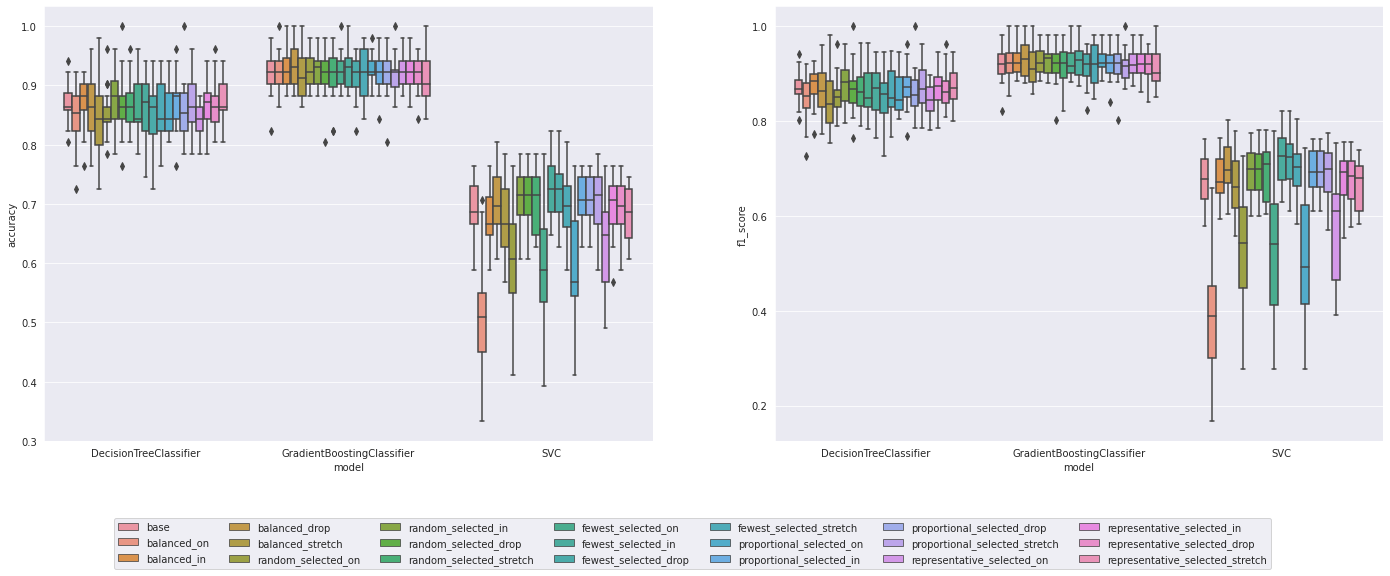

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(24, 8))
sns.boxplot(starkey_results, x='model', y='accuracy', hue='strategy', hue_order=order_one, ax=ax[0])
sns.boxplot(starkey_results, x='model', y='f1_score', hue='strategy', hue_order=order_one, ax=ax[1])

# Get the handles and labels from all subplots
handles, labels = plt.gca().get_legend_handles_labels()

# Create the figure legend
fig_legend = plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(order_one)//3)
ax[0].legend_.remove()
ax[1].legend_.remove()

# Show the plot
plt.show()

plt.tight_layout()

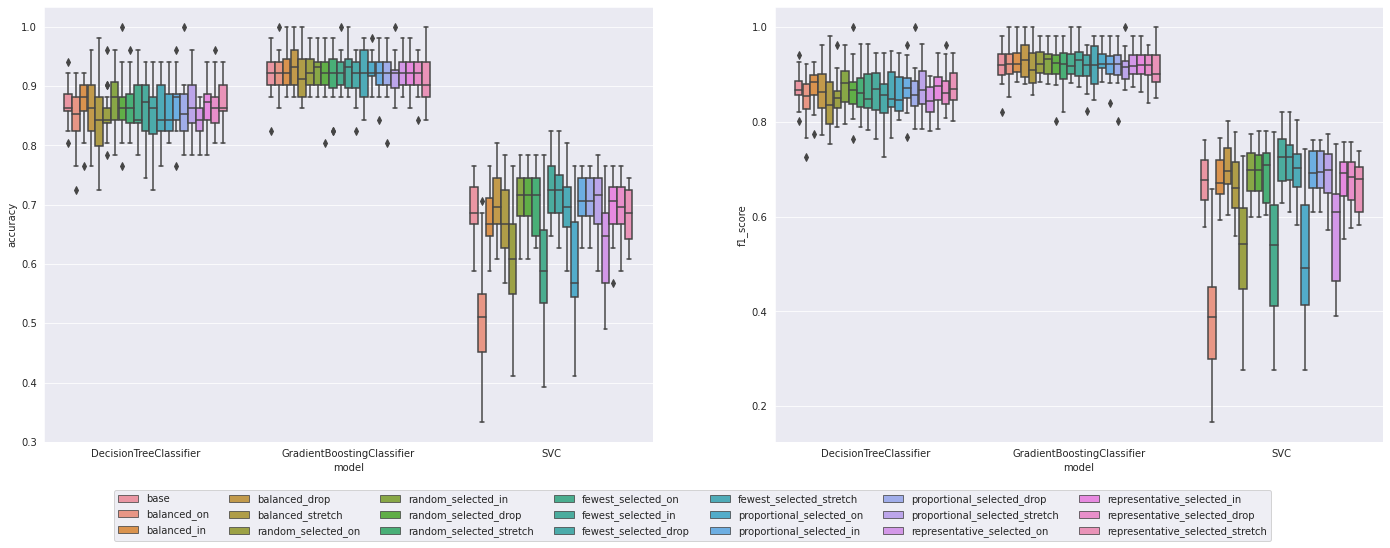

<Figure size 432x288 with 0 Axes>

In [41]:
fig1, ax1 = plt.subplots(1, 2, figsize=(24, 8))
sns.boxplot(starkey_results, x='model', y='accuracy', hue='strategy', hue_order=order_one, ax=ax1[0])
sns.boxplot(starkey_results, x='model', y='f1_score', hue='strategy', hue_order=order_one, ax=ax1[1])

# Get the handles and labels from all subplots
handles, labels = plt.gca().get_legend_handles_labels()

# Create the figure legend
fig1_legend = plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(order_one)//3)
ax1[0].legend_.remove()
ax1[1].legend_.remove()

# Show the plot
plt.show()

plt.tight_layout()

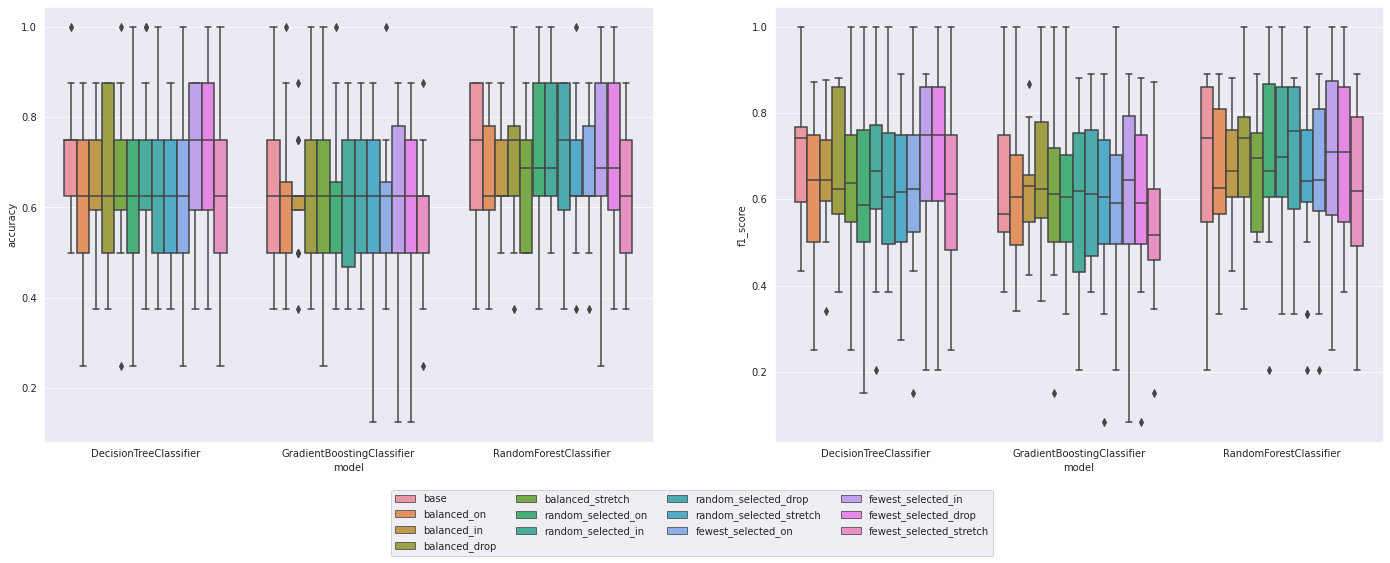

<Figure size 432x288 with 0 Axes>

In [43]:
fig2, ax2 = plt.subplots(1, 2, figsize=(24, 8))
sns.boxplot(gl_results, x='model', y='accuracy', hue='strategy', hue_order=order_two, ax=ax2[0])
sns.boxplot(gl_results, x='model', y='f1_score', hue='strategy', hue_order=order_two, ax=ax2[1])

# Get the handles and labels from all subplots
handles, labels = plt.gca().get_legend_handles_labels()

# Create the figure legend
fig2_legend = plt.figlegend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=len(order_two)//3)
ax2[0].legend_.remove()
ax2[1].legend_.remove()

# Show the plot
plt.show()

plt.tight_layout()

In [5]:
seeds = starkey_results.seed.unique()
models = starkey_results.model.unique()

for seed in seeds:
    for model in models:
        small = starkey_results.loc[(starkey_results.model == model) & (starkey_results.seed == seed)]
        base = small.loc[small.strategy == 'base'][['accuracy', 'f1_score']].values
        max_accuracy = small.loc[small.accuracy == small.accuracy.max()]['accuracy'].values[0]
        max_f1 = small.loc[small.f1_score == small.f1_score.max()]['f1_score'].values[0]
        print(f'Seed: {seed}, Model: {model}, Base Accuracy: {base[0][0]:.4f},'
              f' Base F1: {base[0][1]:.4f}, Max Accuracy: {max_accuracy:.4f}, Max F1: {max_f1:.4f}')
    print("-----------------")

Seed: 781, Model: DecisionTreeClassifier, Base Accuracy: 0.9020, Base F1: 0.8935, Max Accuracy: 0.9216, Max F1: 0.9122
Seed: 781, Model: GradientBoostingClassifier, Base Accuracy: 0.9216, Base F1: 0.9182, Max Accuracy: 0.9412, Max F1: 0.9371
Seed: 781, Model: SVC, Base Accuracy: 0.5882, Base F1: 0.5776, Max Accuracy: 0.6471, Max F1: 0.6435
-----------------
Seed: 899, Model: DecisionTreeClassifier, Base Accuracy: 0.8627, Base F1: 0.8673, Max Accuracy: 0.9216, Max F1: 0.9251
Seed: 899, Model: GradientBoostingClassifier, Base Accuracy: 0.9020, Base F1: 0.9083, Max Accuracy: 0.9608, Max F1: 0.9608
Seed: 899, Model: SVC, Base Accuracy: 0.6667, Base F1: 0.6367, Max Accuracy: 0.7255, Max F1: 0.7274
-----------------
Seed: 1058, Model: DecisionTreeClassifier, Base Accuracy: 0.8235, Base F1: 0.8194, Max Accuracy: 0.9216, Max F1: 0.9252
Seed: 1058, Model: GradientBoostingClassifier, Base Accuracy: 0.9020, Base F1: 0.9002, Max Accuracy: 0.9412, Max F1: 0.9408
Seed: 1058, Model: SVC, Base Accurac

In [6]:
seeds = traffic_results.seed.unique()
models = traffic_results.model.unique()

for seed in seeds:
    for model in models:
        small = starkey_results.loc[(traffic_results.model == model) & (traffic_results.seed == seed)]
        base = small.loc[small.strategy == 'base'][['accuracy', 'f1_score']].values
        max_accuracy = small.loc[small.accuracy == small.accuracy.max()]['accuracy'].values[0]
        max_f1 = small.loc[small.f1_score == small.f1_score.max()]['f1_score'].values[0]
        print(f'Seed: {seed}, Model: {model}, Base Accuracy: {base[0][0]:.4f},'
              f' Base F1: {base[0][1]:.4f}, Max Accuracy: {max_accuracy:.4f}, Max F1: {max_f1:.4f}')
    print("-----------------")

Seed: 781, Model: DecisionTreeClassifier, Base Accuracy: 0.9020, Base F1: 0.8935, Max Accuracy: 0.9216, Max F1: 0.9122
Seed: 781, Model: GradientBoostingClassifier, Base Accuracy: 0.9216, Base F1: 0.9182, Max Accuracy: 0.9412, Max F1: 0.9371
Seed: 781, Model: SVC, Base Accuracy: 0.5882, Base F1: 0.5776, Max Accuracy: 0.6471, Max F1: 0.6435
-----------------
Seed: 899, Model: DecisionTreeClassifier, Base Accuracy: 0.8627, Base F1: 0.8673, Max Accuracy: 0.9216, Max F1: 0.9251
Seed: 899, Model: GradientBoostingClassifier, Base Accuracy: 0.9020, Base F1: 0.9083, Max Accuracy: 0.9608, Max F1: 0.9608
Seed: 899, Model: SVC, Base Accuracy: 0.6667, Base F1: 0.6367, Max Accuracy: 0.7255, Max F1: 0.7274
-----------------
Seed: 1058, Model: DecisionTreeClassifier, Base Accuracy: 0.8235, Base F1: 0.8194, Max Accuracy: 0.9216, Max F1: 0.9252
Seed: 1058, Model: GradientBoostingClassifier, Base Accuracy: 0.9020, Base F1: 0.9002, Max Accuracy: 0.9412, Max F1: 0.9408
Seed: 1058, Model: SVC, Base Accurac

In [7]:
rdf = pd.read_csv('./results/geolife_results.csv')
seeds = rdf.seed.unique()
models = rdf.model.unique()

for seed in seeds:
    for model in models:
        small = rdf.loc[(rdf.model == model) & (rdf.seed == seed)]
        base = small.loc[small.strategy == 'base'][['accuracy', 'f1_score']].values
        max_accuracy = small.loc[small.accuracy == small.accuracy.max()]['accuracy'].values[0]
        max_f1 = small.loc[small.f1_score == small.f1_score.max()]['f1_score'].values[0]
        print(f'Seed: {seed}, Model: {model}, Base Accuracy: {base[0][0]:.4f},'
              f' Base F1: {base[0][1]:.4f}, Max Accuracy: {max_accuracy:.4f}, Max F1: {max_f1:.4f}')
    print("-----------------")

Seed: 781, Model: DecisionTreeClassifier, Base Accuracy: 0.5000, Base F1: 0.4333, Max Accuracy: 0.6250, Max F1: 0.6310
Seed: 781, Model: GradientBoostingClassifier, Base Accuracy: 0.5000, Base F1: 0.4333, Max Accuracy: 0.7500, Max F1: 0.7500
Seed: 781, Model: RandomForestClassifier, Base Accuracy: 0.5000, Base F1: 0.4333, Max Accuracy: 0.7500, Max F1: 0.7500
-----------------
Seed: 899, Model: DecisionTreeClassifier, Base Accuracy: 0.5000, Base F1: 0.5000, Max Accuracy: 0.8750, Max F1: 0.8818
Seed: 899, Model: GradientBoostingClassifier, Base Accuracy: 0.5000, Base F1: 0.5000, Max Accuracy: 0.7500, Max F1: 0.7500
Seed: 899, Model: RandomForestClassifier, Base Accuracy: 0.7500, Base F1: 0.7500, Max Accuracy: 0.8750, Max F1: 0.8590
-----------------
Seed: 1058, Model: DecisionTreeClassifier, Base Accuracy: 0.8750, Base F1: 0.8682, Max Accuracy: 1.0000, Max F1: 1.0000
Seed: 1058, Model: GradientBoostingClassifier, Base Accuracy: 0.6250, Base F1: 0.4808, Max Accuracy: 1.0000, Max F1: 1.000